In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../")
import helpers

from pathlib import Path
from importlib import reload
reload(helpers)

sys.path.append("../../../gempy")
import gempy as gp
from gempy.assets import topology as tp

import os
data_folder = Path("D:/datasets/paper_topology/03_gullfaks/")
from gempy.utils.analysis import calculate_ie

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
reload(helpers)
geo_model, edges_init, centroids_init = helpers.prepare_geomodel(resolution=(60,50,60))

C:\Users\r02as18\miniconda3\envs\topology\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
../../../gempy\gempy\core\data.py:1742: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


In [3]:
reload(tp)
edges_init, centroids_init = tp.clean_unconformity_topology(geo_model, 1, edges_init, centroids_init)

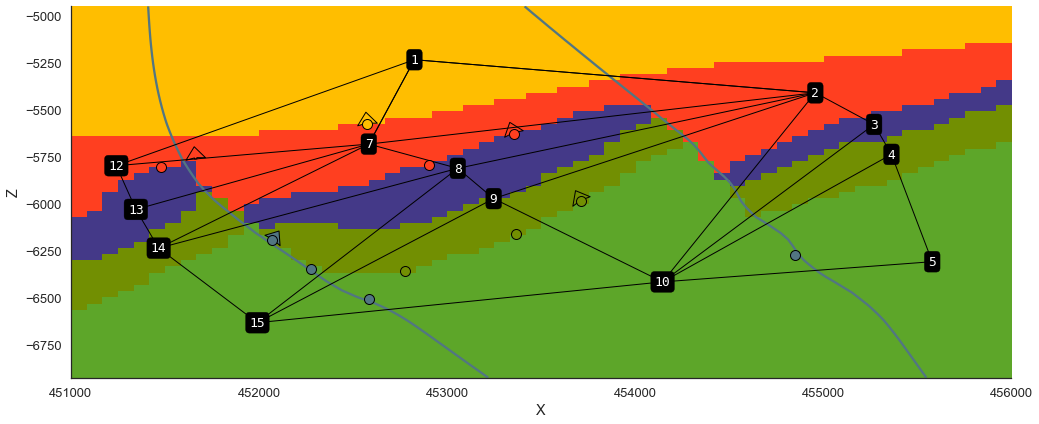

In [4]:
# 60,50,60
gp.plot.plot_section(geo_model, 36)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [6]:
import ipywidgets as wi

@wi.interact(
    n=wi.IntSlider(value=36, min=0, max=59)
)
def p(n):
    edges, ctr = tp.compute_topology(geo_model, n, direction="Y")
    edges, ctr = tp.clean_unconformity_topology(geo_model, 1, edges, ctr)
    gp.plot.plot_section(geo_model, n)
    gp.plot.plot_topology(geo_model, edges, ctr)

interactive(children=(IntSlider(value=36, description='n', max=59), Output()), _dom_classes=('widget-interact'…

In [70]:
from gempy.plot import vista as vs

In [72]:
reload(vs)
gpv = vs.Vista(geo_model, notebook=False)

fault3 = gpv.plot_surface("fault3", opacity=0.5)
fault4 = gpv.plot_surface("fault4", opacity=0.5)
gpv.plot_surface("BCU", opacity=0.5)

etive = gpv.clip_horizon_with_faults(gpv.get_surface("tarbert"), [fault4[0], fault3[0]])
for mesh in etive:
    gpv.p.add_mesh(mesh, color="#728f02")
    
ness = gpv.clip_horizon_with_faults(gpv.get_surface("ness"), [fault4[0], fault3[0]])
for mesh in ness:
    gpv.p.add_mesh(mesh, color="#443988")
    
tarbert = gpv.clip_horizon_with_faults(gpv.get_surface("etive"), [fault4[0], fault3[0]])
for mesh in tarbert:
    gpv.p.add_mesh(mesh, color="#ff3f20")
    
# gpb.plot_surface_points_all()

gpv.show()

# Resolution sensitivity of topology distribution

In [25]:
import pickle

In [44]:
simulations = ["res"+str(i) for i in range(20, 81, 10)]
threshold = "1.0"

In [105]:
n_u_topo_1 = []
n_u_topo_5 = []
n_u_topo_10 = []

for simulation in simulations:
    fp = data_folder / simulation / threshold
    with open(fp / "edges.pkl", "rb") as f:
        edges = pickle.load(f)
    u, c, idx = tp.count_unique_topologies(edges)
    n_u_topo_1.append(len(np.array(u)[np.array(c)>1]))
    n_u_topo_5.append(len(np.array(u)[np.array(c)>5]))
    n_u_topo_10.append(len(np.array(u)[np.array(c)>10]))

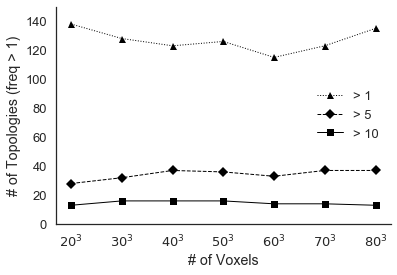

In [177]:
res = [ f"${res[3:]}^3$" for res in simulations]
kwargs = dict(linewidth=1, color="black", markersize=7)
fig, ax  = plt.subplots()
ax.plot(res, n_u_topo_1, label="> 1", linestyle="dotted", marker="^", **kwargs)
ax.plot(res, n_u_topo_5, label="> 5", linestyle="dashed", marker="D", **kwargs)
ax.plot(res, n_u_topo_10, label="> 10", marker="s", **kwargs)
ax.set_ylim(0, 150)
ax.set_xlabel("# of Voxels")
ax.set_ylabel("# of Topologies (freq > 1)")
legend = ax.legend()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.gca().axes.get_yaxis().set_visible(False)

# Forward simulation

In [27]:
# load data
simulation = Path("forward_paper")
threshold = "1.0"
priors = helpers.load_priors(data_folder / simulation / "priors.json")
samples = helpers.load_samples(data_folder / simulation / threshold,)

In [28]:
edges = samples.get("edges")
edges_forward = edges
centroids = samples.get("centroids")

In [52]:
u, c, idx = tp.count_unique_topologies(edges)

In [44]:
c.sort()

In [54]:
np.argmax(c)

27

In [69]:
0.00588 * 100

0.588

In [70]:
144128 / 60 / 60

40.035555555555554

In [62]:
np.array(edges)[idx == np.argmax(c)][0] == edges_init

False

In [51]:
np.count_nonzero(np.array(c) > 1)

116

In [9]:
from gempy.utils.analysis import calculate_ie

Text(0.5, 1.0, '0.233')

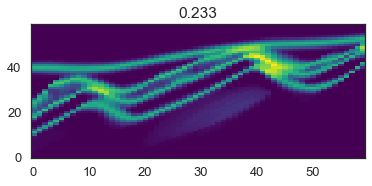

In [11]:
res = (60,50,60)
lb = samples.get("lb").astype(int)
ie_block, ie_total = calculate_ie(lb)

plt.imshow(ie_block.reshape(res)[:, 12, :].T, origin="lower", aspect=0.4, cmap="viridis")
plt.title(f"{ie_total:.03f}")

Text(0.5, 1.0, '0.233')

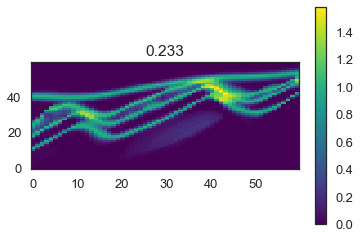

In [20]:
im = plt.imshow(ie_block.reshape(res)[:, 12, :].T, origin="lower", aspect=0.4, cmap="viridis")
plt.colorbar(im)
plt.title(f"{ie_total:.03f}")

# Rejection (ABC-REJ) sampling

## Threshold = 0.05

In [131]:
simulation = Path("rej")
threshold = "0.05"
priors = helpers.load_priors(data_folder / simulation / "priors.json")
samples = helpers.load_samples(data_folder / simulation / threshold)

In [132]:
edges = samples.get("edges")
edges_0_05 = edges 
centroids = samples.get("centroids")

In [98]:
u, c, idx = tp.count_unique_topologies(edges)

<BarContainer object of 10 artists>

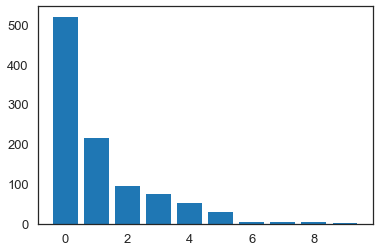

In [99]:
plt.bar(range(len(u)), np.sort(c)[::-1])

Text(0.5, 1.0, '0.086')

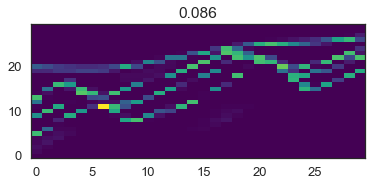

In [97]:
lb = samples.get("lb").astype(int)
ie_block, ie_total = calculate_ie(lb)
plt.imshow(ie_block.reshape(res)[:, 12, :].T, origin="lower", aspect=0.4, cmap="viridis")
plt.title(f"{ie_total:.03f}")

## Threshold = 0.0001

In [133]:
simulation = Path("rej")
threshold = "0.0001"
priors = helpers.load_priors(data_folder / simulation / "priors.json")
samples = helpers.load_samples(data_folder / simulation / threshold)

In [134]:
edges = samples.get("edges")
edges_0_0001 = edges
centroids = samples.get("centroids")

In [100]:
u, c, idx = tp.count_unique_topologies(edges)

(-1, 9.5)

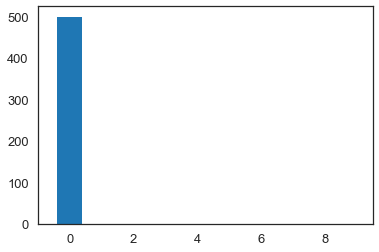

In [101]:
plt.bar(range(len(u)), np.sort(c)[::-1])
plt.xlim(-1,9.5)

Text(0.5, 1.0, '0.073')

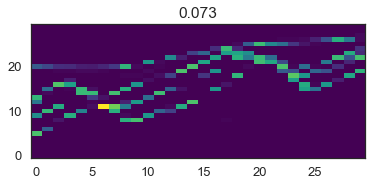

In [102]:
lb = samples.get("lb").astype(int)
ie_block, ie_total = calculate_ie(lb)
plt.imshow(ie_block.reshape(geo_model.grid.regular_grid.resolution)[:, 12, :].T, origin="lower", aspect=0.4, cmap="viridis")
plt.title(f"{ie_total:.03f}")

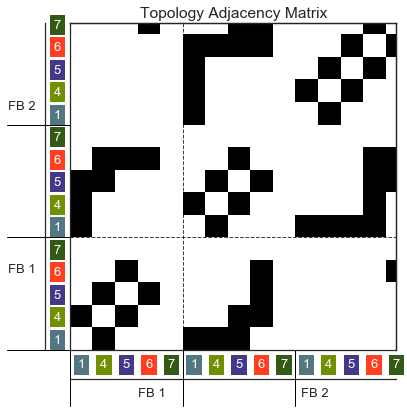

In [139]:
tp.plot_adjacency_matrix(geo_model, tp.get_adjacency_matrix(geo_model, edges[0], centroids[0]))

In [144]:
edges[0] == edges[1]

True

In [146]:
np.sum(tp.get_adjacency_matrix(geo_model, edges[0], centroids[0]) ^ tp.get_adjacency_matrix(geo_model, edges[1], centroids[1]))

9

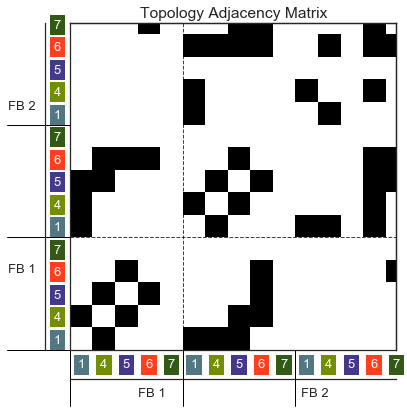

In [143]:
tp.plot_adjacency_matrix(geo_model, tp.get_adjacency_matrix(geo_model, edges[1], centroids[1]))

<div class="alert alert-warning" style="color: black; background-color: #FF5656; border-color: #FF5656; padding: 10px">
<b>NOTE</b> This mismatch could be because of the unconformity being spread across 3 fault blocks, but being reduces to 1 node and this somehow fucks things up??
</div>

# Barplots

In [135]:
edges = [edges_forward, edges_0_05, edges_0_0001]

In [20]:
edges = helpers.load_sample(data_folder / simulation / threshold / "edges.pkl")

In [28]:
u, c, idx = tp.count_unique_topologies(edges)

In [38]:
c_filtered = c[c > 2]
c_filtered.sort()

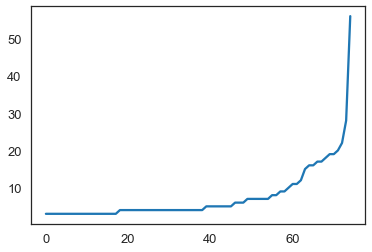

In [39]:
plt.plot(c_filtered)

# PRIOR STUDY

In [8]:
threshold = "1.0"
ie_blocks = []
ie_totals = []
cs = []
simulations = []
for simulation in [f"fw_hires{i}" for i in range(1, 5)]:
    simulations.append(simulation)
    lbs = helpers.load_sample(data_folder / simulation / threshold / "lb.npy").astype(int)
    edges = helpers.load_sample(data_folder / simulation / threshold / "edges.pkl")
    u, c, idx = tp.count_unique_topologies(edges)
    cs.append(c)
    ie, iet = calculate_ie(lbs)
    ie_blocks.append(ie)
    ie_totals.append(iet)

In [16]:
cum = [0]
_ = []
for topology in edges:
    if topology not in _:
        _.append(topology)
        cum.append(cum[-1] + 1)
    else:
        cum[-1] += 1

<BarContainer object of 4 artists>

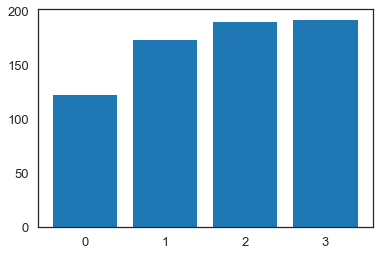

In [54]:
plt.bar(range(4),[len(c) for c in cs])

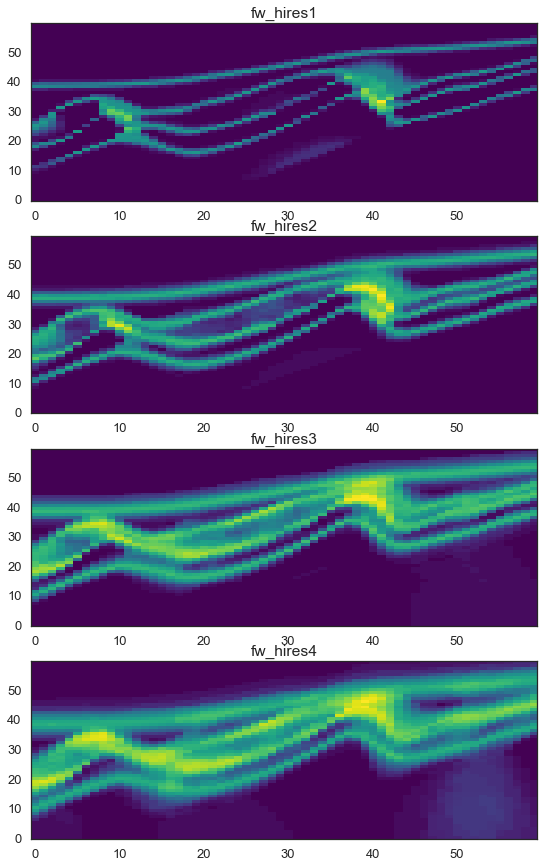

In [55]:
fig, axes = plt.subplots(nrows=4, figsize=(10,15))
for ie, iet, ax, sim in zip(ie_blocks, ie_totals, axes, simulations):
    ax.imshow(ie.reshape(60,50,60)[:,36,:].T, origin="lower", cmap="viridis", aspect=0.35)
    ax.set_title(str(sim))

# Sequential Monte Carlo (ABC-SMC) sampling 

In [21]:
from gempy.utils.analysis import calculate_ie

In [22]:
# simulation = Path("smc_jac_testrun1")
# simulation = Path("smc_jac_paper_hires")
simulation = Path("smc_jac_paper_hires1")
priors = helpers.load_priors(data_folder / simulation / "priors.json")
thresholds = [t for t in os.listdir(data_folder / simulation) if os.path.isdir(data_folder / simulation / t)]

In [21]:
samples = {}
for t in thresholds:
    samples[t] = helpers.load_samples(
        data_folder / simulation / t, 
        skip=("vertices", "simplices", "edges", "centroids", "lb")
    )

In [39]:
samples.keys()

dict_keys(['0.01', '0.025', '0.05', '0.075', '0.1', '0.2', '0.3'])

dict_keys(['BCU', 'etive A', 'etive B', 'etive C', 'fault3', 'fault4', 'ness A', 'ness B', 'ness C', 'tarbert A', 'tarbert B', 'tarbert C'])

In [51]:
params = samples["0.01"].keys()

stds = {param: [] for param in params}
means = {param: [] for param in params}

for param in params:
    for threshold in thresholds:
        vals = samples[threshold][param]
        stds[param].append(np.std(vals))
        means[param].append(np.mean(vals))
    
    

[0.01, 0.025, 0.05, 0.075, 0.1, 0.2, 0.3]

In [54]:
import pandas as pd

In [74]:
df_means.index

Float64Index([0.3, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01], dtype='float64', name='threshold')

In [80]:
df_means["BCU"].index

Float64Index([0.3, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01], dtype='float64', name='threshold')

In [82]:
from scipy.stats import iqr

In [83]:
iqr(vals)

54.978738544045044

In [90]:
df_stds

,BCU,etive A,etive B,etive C,fault3,fault4,ness A,ness B,ness C,tarbert A,tarbert B,tarbert C
threshold,,,,,,,,,,,,
0.300,41.341596,52.023264,45.937606,44.490268,35.705548,74.391496,47.618197,41.303410,40.154522,44.308896,41.860215,39.960464
0.200,38.879692,56.149803,42.736075,42.302245,25.886616,27.811717,42.900090,37.468127,36.654790,37.701303,39.724118,37.437084
0.100,38.656411,55.424292,39.101878,40.982013,22.791675,23.153321,40.906795,32.048854,36.255481,34.851343,39.306277,35.026586
0.075,36.898748,56.251690,37.232418,40.089565,19.978820,21.156615,41.711393,30.078435,35.305348,34.934016,37.744205,34.098171
0.050,28.535809,56.440030,35.076509,38.405630,18.580425,19.448463,42.140832,28.196370,33.915522,34.124117,34.406037,32.196067
0.025,27.824228,56.633503,34.085737,33.156253,17.774271,18.108314,40.583810,25.188603,31.584656,32.454046,29.110616,28.462752
0.010,27.168316,55.270189,33.960466,31.174864,17.031573,17.564812,40.891629,23.660659,30.056760,34.707828,25.444565,26.128392


In [22]:
edges_ = {}
for threshold in thresholds:
    try:
        edges_[threshold] = helpers.load_sample(data_folder / simulation / threshold / "edges.pkl")
    except:
        pass

In [24]:
ie_blocks = []
ie_totals = []
for threshold in thresholds:
    lbs = helpers.load_sample(data_folder / simulation / threshold / "lb.npy").astype(int)
    ie, iet = calculate_ie(lbs)
    del lbs
    ie_blocks.append(ie)
    ie_totals.append(iet)

<BarContainer object of 7 artists>

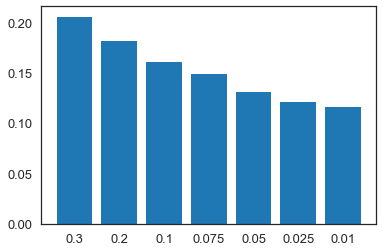

In [95]:
plt.bar(thresholds[::-1], ie_totals[::-1])

In [25]:
ie_totals[-2]

0.18114652711206936

In [74]:
a = np.arange(10)
a //= 2

In [75]:
a

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])

In [26]:
def count_unique_topologies(simulated_topologies):
    unique_topologies = [simulated_topologies[0]]
    unique_count = [1]

    for topology in simulated_topologies[1:]:
        skip = False
        for idx, unique_topology in enumerate(unique_topologies):
            if topology == unique_topology:
                unique_count[idx] += 1
                skip = True
                break
        if not skip:
            unique_topologies.append(topology)
            unique_count.append(1)
    
    return unique_topologies, unique_count

In [32]:
simulated_topologies_all = {}
for threshold in thresholds:
    simulated_topologies = helpers.load_sample(data_folder / simulation / threshold / "edges.pkl")
    ut, uc = count_unique_topologies(simulated_topologies)
    simulated_topologies_all[threshold] = {
        "all_topo": simulated_topologies,
        "unique_topo": ut,
        "unique_topo_count": uc
    }

In [33]:
vals = []
for threshold, dict_ in simulated_topologies_all.items():
    uc = dict_["unique_topo_count"]
    print(threshold, uc)
    vals.append(len(uc))

<BarContainer object of 7 artists>

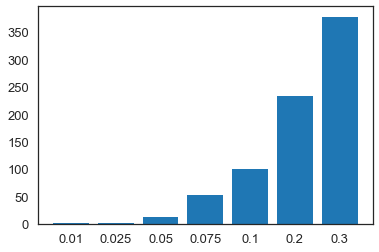

In [35]:
fig, ax = plt.subplots()
ax.bar(list(simulated_topologies_all.keys()), vals)



In [38]:
vals

[1, 1, 13, 53, 99, 234, 378]

NameError: name 'ie_blocks' is not defined

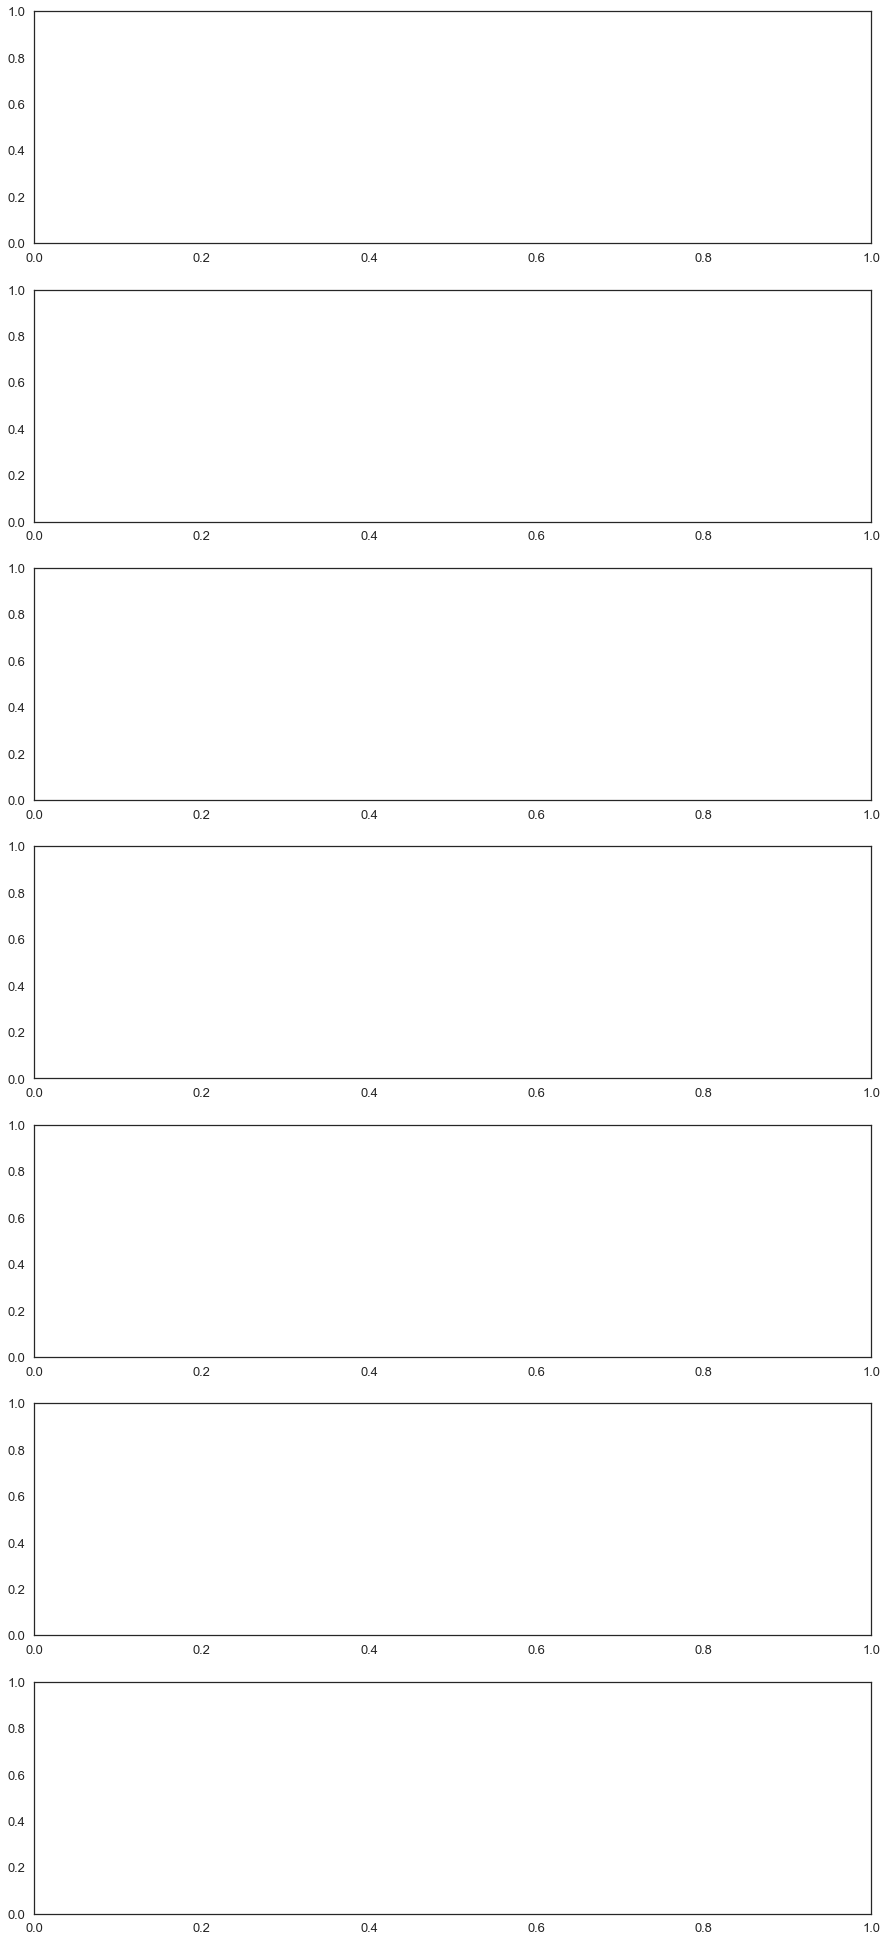

In [23]:
fig, axes = plt.subplots(nrows=len(thresholds), figsize=(15,5*len(thresholds)))
vmax = np.array(ie_blocks).max()
for ie, iet, ax, threshold in zip(ie_blocks, ie_totals, axes, thresholds):
    im = ax.imshow(ie.reshape(60,50,60)[:,36,:].T, origin="lower", cmap="viridis", aspect=0.3, vmin=0, vmax=vmax)
    ax.set_title(f"Threshold: {threshold}, IEt: {iet:.03f}")
    

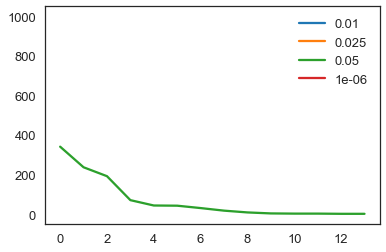

In [144]:
fig, ax = plt.subplots()
n_ = []
for threshold, e in edges_.items():
    u, c, idx = tp.count_unique_topologies(e)
    print(c)
    c_filtered = c[c > 0]
    c_filtered.sort()
    n_.append(len(c_filtered))
    
    ax.plot(c_filtered[::-1], label=threshold)
    
ax.legend()

In [128]:
n_

[1, 1, 12]

In [58]:
centroids_init

{2: array([23.52993806, 15.02133517, 22.779766  ]),
 3: array([25.43829787, 16.14893617, 20.23191489]),
 4: array([25.88005579, 15.69456067, 17.74895397]),
 5: array([27.22998673, 15.84520124,  9.11189739]),
 7: array([ 9.26378738, 14.39069767, 18.6166113 ]),
 8: array([12.09345794, 15.74851317, 16.65505523]),
 9: array([13.24740125, 14.11711712, 14.23631324]),
 10: array([18.63284077, 13.52322075,  7.49291315]),
 12: array([ 1.19157895, 14.16842105, 16.90105263]),
 13: array([ 1.82198953, 15.42757417, 13.36474695]),
 14: array([ 2.56795422, 14.77968526, 10.26180258]),
 15: array([ 5.70203709, 14.0513834 ,  4.20310125]),
 1: array([10.72389836, 15.140738  , 25.44000045])}

In [64]:
edges_init_sim = {(7, 12), (2, 8), (8, 9), (10, 15), (1, 6), (7, 11), (1, 2), (8, 14), (6, 7), (2, 9), (9, 15), (12, 13), (3, 10), (3, 4), (8, 15), (4, 10), (7, 14), (2, 6), (4, 5), (6, 11), (2, 10), (9, 10), (2, 3), (14, 15), (6, 12), (11, 12), (2, 7), (5, 10), (6, 8), (13, 14), (7, 13), (1, 7), (7, 8)}
edges = {(7, 12), (2, 8), (8, 9), (10, 15), (1, 2), (8, 14), (4, 9), (2, 9), (9, 15), (12, 13), (3, 10), (8, 15), (4, 10), (7, 14), (7, 1), (4, 5), (9, 10), (3, 9), (2, 3), (14, 15), (2, 7), (7, 8), (5, 10), (1, 12), (13, 14), (7, 13), (1, 7), (3, 4)}

KeyError: 6

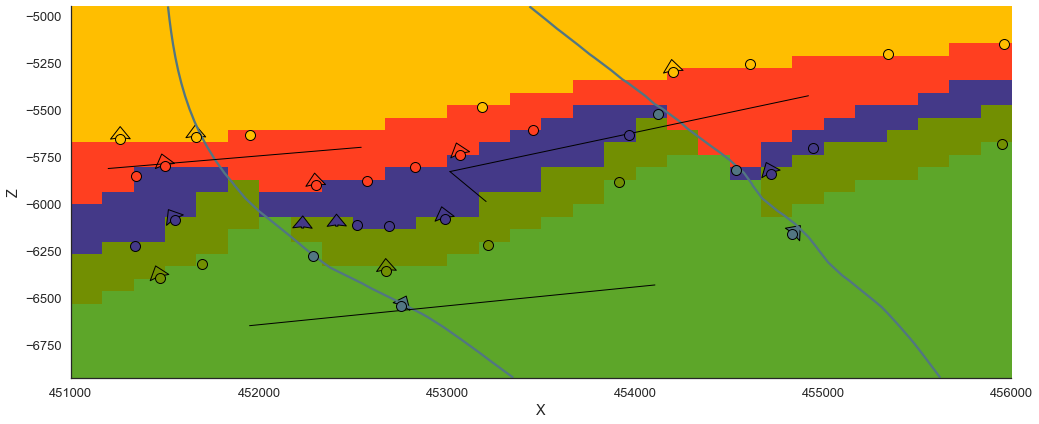

In [59]:
gp.plot.plot_section(geo_model, 24)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [16]:
def plot_posteriors(samples:dict, name:str, axes=None, hist_kwargs={}):
    if axes is None:
        fig, axes = plt.subplots(nrows=len(samples.keys()), sharex=True, figsize=(5, 10), sharey=True)
    # for row, (threshold, tsamples) in enumerate(samples.items()):
    for row, key in enumerate(np.sort(np.array(list(samples.keys())).astype(float))[::-1]):
        plot_posterior(samples, name, key, ax=axes[row], hist_kwargs=hist_kwargs)
    axes[0].set_title(name)
    plt.setp(axes, ylim=(0, 0.06))
    
    
def plot_posterior(samples:dict, name:str, threshold:str, ax=None, hist_kwargs={}):
    if not ax:
        fig, ax = plt.subplots()
        
    tsamples = samples[str(threshold)]
    vals = tsamples[name]
    std = np.std(vals)
    mean = np.mean(vals)
    
    label = f"ε {threshold}\nμ {mean:.02f}\nσ {std:.01f}"
    
    hkwargs = dict(bins=24, color="black", density=True)
    hkwargs.update(hist_kwargs)
    ax.hist(
        vals, 
        label=label, **hkwargs
    )
    ax.legend(
        frameon=False, loc="upper left",
        handlelength=0, handletextpad=0
    )
    

    ax.axvline(mean, color="black", linewidth=1, linestyle="dashed", alpha=0.5)
    ax.fill_betweenx([0, 0.06], mean-std, mean+std, color="lightgrey", alpha=0.5)

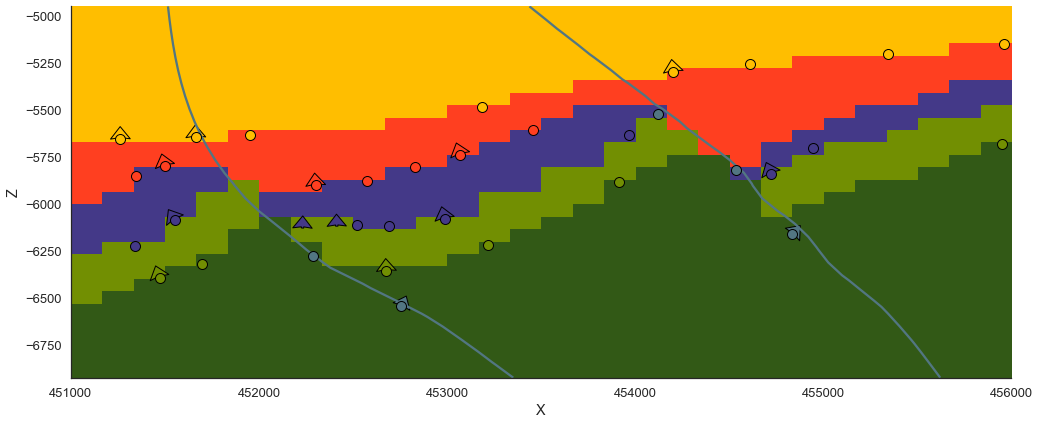

In [138]:
gp.plot.plot_section(geo_model, 24)

In [8]:
def plot_prior(priors, name, axes):
    x = np.linspace(-70, 70, 500)
    y = priors.get(name).pdf(x)
    for ax in axes.flat:
        ax.plot(x, y, linewidth=1, color="black")

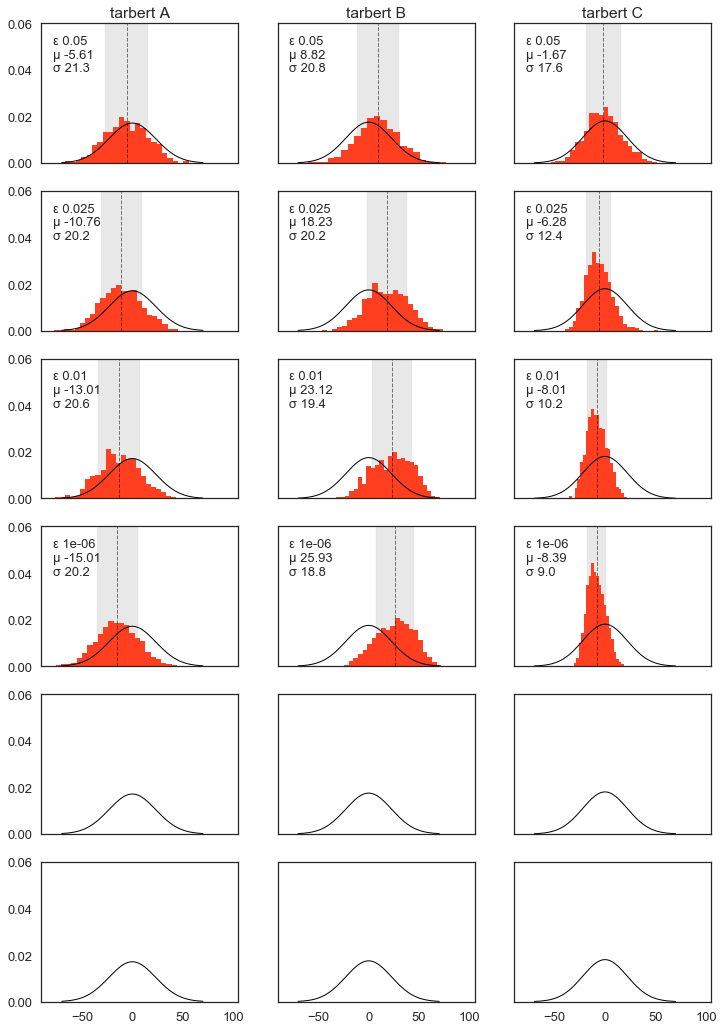

In [9]:
nrows = 6
ncols = 3
name = "tarbert"
hist_kwargs = dict(color="#ff3f20")
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, figsize=(4*ncols, 3*nrows), sharey=True)
plot_posteriors(samples, f"{name} A", axes=axes[:, 0], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} A", axes[:, 0])
plot_posteriors(samples, f"{name} B", axes=axes[:, 1], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} B", axes[:, 1])
plot_posteriors(samples, f"{name} C", axes=axes[:, 2], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} C", axes[:, 2])

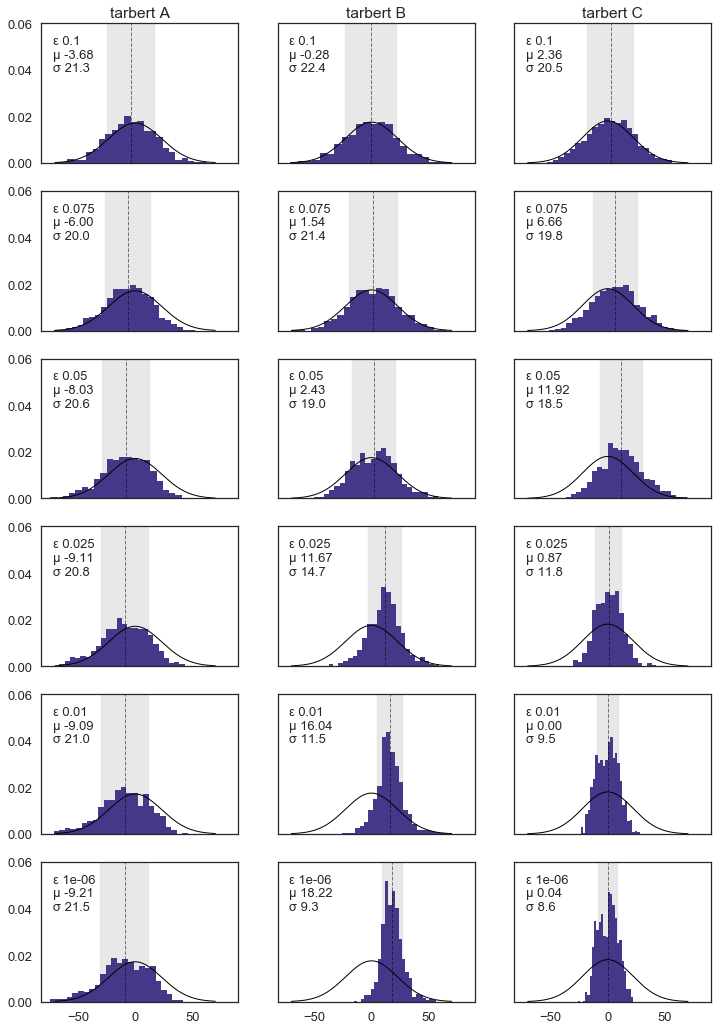

In [229]:
nrows = 6
ncols = 3
name = "tarbert"
hist_kwargs = dict(color="#443988")
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, figsize=(4*ncols, 3*nrows), sharey=True)
plot_posteriors(samples, f"{name} A", axes=axes[:, 0], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} A", axes[:, 0])
plot_posteriors(samples, f"{name} B", axes=axes[:, 1], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} B", axes[:, 1])
plot_posteriors(samples, f"{name} C", axes=axes[:, 2], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} C", axes[:, 2])

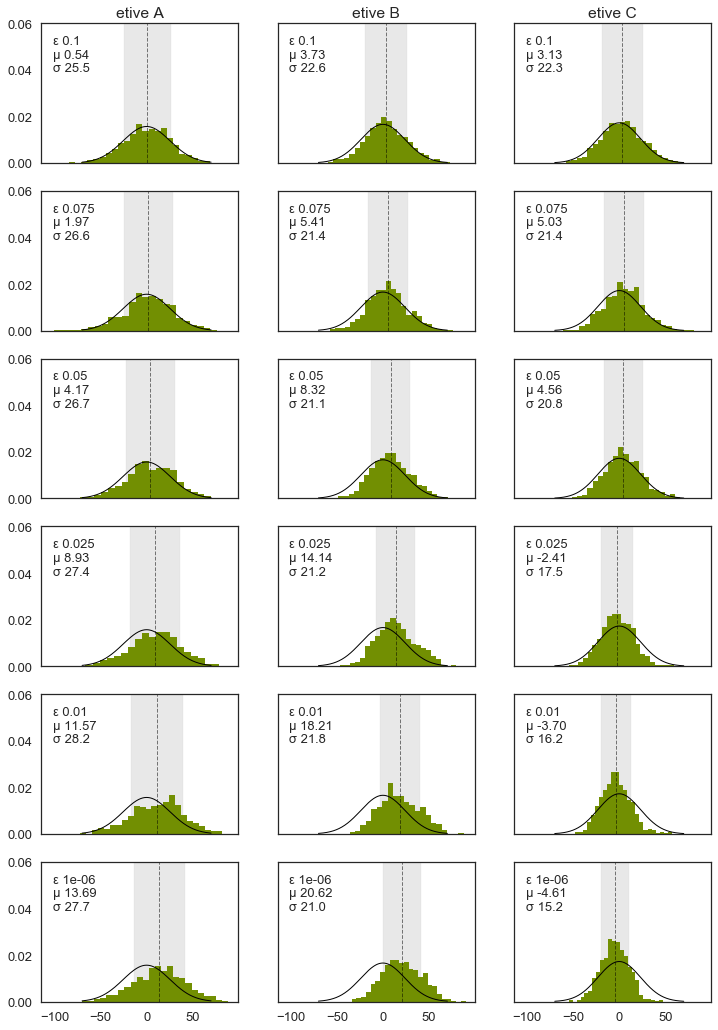

In [230]:
nrows = 6
ncols = 3
name = "etive"
hist_kwargs = dict(color="#728f02")
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, figsize=(4*ncols, 3*nrows), sharey=True)
plot_posteriors(samples, f"{name} A", axes=axes[:, 0], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} A", axes[:, 0])
plot_posteriors(samples, f"{name} B", axes=axes[:, 1], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} B", axes[:, 1])
plot_posteriors(samples, f"{name} C", axes=axes[:, 2], hist_kwargs=hist_kwargs)
plot_prior(priors, f"{name} C", axes[:, 2])

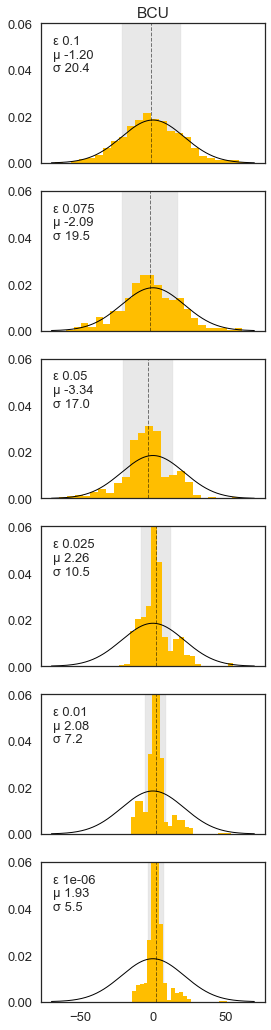

In [232]:
ncols = 1
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, figsize=(4*ncols, 3*nrows), sharey=True)
plot_posteriors(samples, "BCU", hist_kwargs=dict(color="#ffbe00"), axes=axes)
plot_prior(priors, f"BCU", axes)

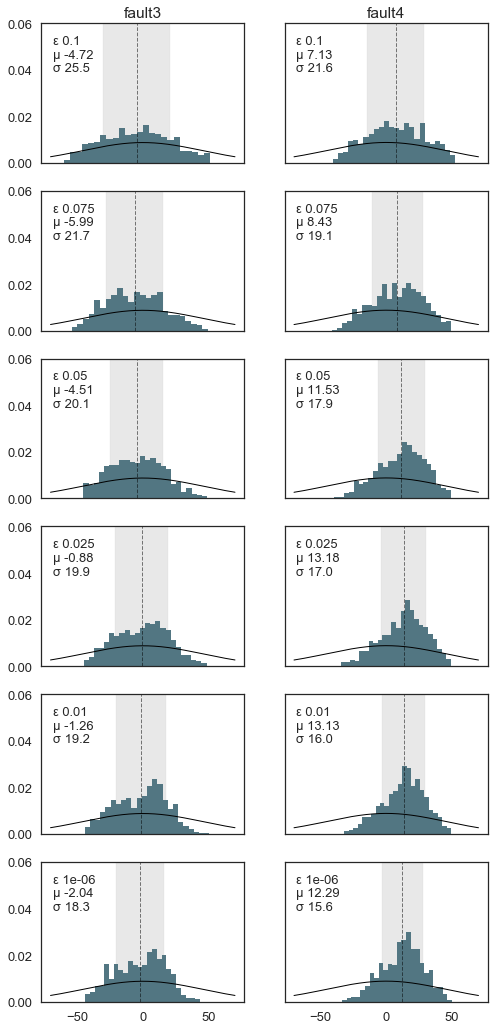

In [233]:
nrows = 6
ncols = 2
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, figsize=(4*ncols, 3*nrows), sharey=True)
plot_posteriors(samples, "fault3", axes=axes[:, 0], hist_kwargs=dict(color="#527682"))
plot_prior(priors, "fault3", axes[:, 0])
plot_posteriors(samples, "fault4", axes=axes[:, 1], hist_kwargs=dict(color="#527682"))
plot_prior(priors, "fault4", axes[:, 1])

### Read log file

In [143]:
with open(data_folder / simulation / "log.txt", "r") as f:
    file = f.read()

#### Parse logfile with regex

In [144]:
n = 1000
import re
p = re.compile("Epoch: \d*")
epochs = [int(t.split(" ")[1]) for t in p.findall(file)]
p = re.compile("Time: \d*")
times = [int(t.split(" ")[1]) / 60 for t in p.findall(file)]
p = re.compile("Acceptance rate: \d*.\d*")
acceptance = [float(t.split(" ")[2]) for t in p.findall(file)]

### Time

Text(0.5, 1.0, 'Total time: 173.6 min for 5 * 1000 samples')

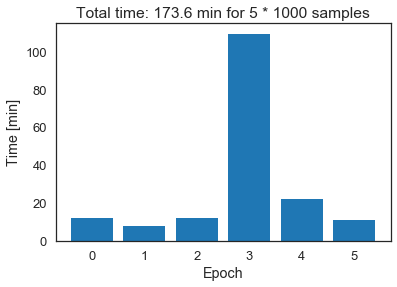

In [145]:
fig, ax = plt.subplots()
ax.set_ylabel("Time [min]")
ax.set_xlabel("Epoch")
ax.bar(epochs, times)
ax.set_title(f"Total time: {np.sum(times):.01f} min for 5 * 1000 samples")

### Acceptance rate

<BarContainer object of 6 artists>

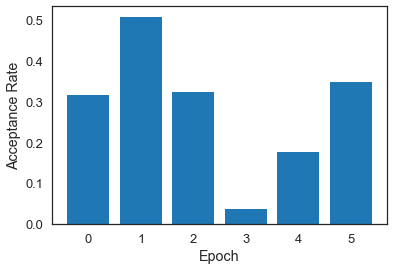

In [146]:
fig, ax = plt.subplots()
ax.set_ylabel("Acceptance Rate")
ax.set_xlabel("Epoch")
ax.bar(epochs, acceptance)

In [175]:
time_rej_0 = 29315 / 60
f"Speed up: {time_rej_0 / np.sum(times):.02f}x - from {time_rej_0 / 60:.02f} hours down to {np.sum(times) / 60:.02f} hours."

'Speed up: 2.81x - from 8.14 hours down to 2.89 hours.'

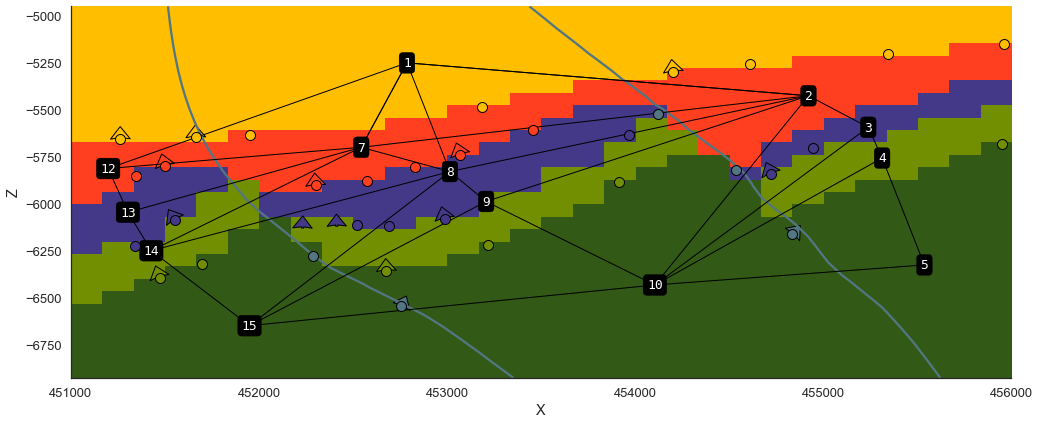

In [136]:
gp.plot.plot_section(geo_model, 24)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

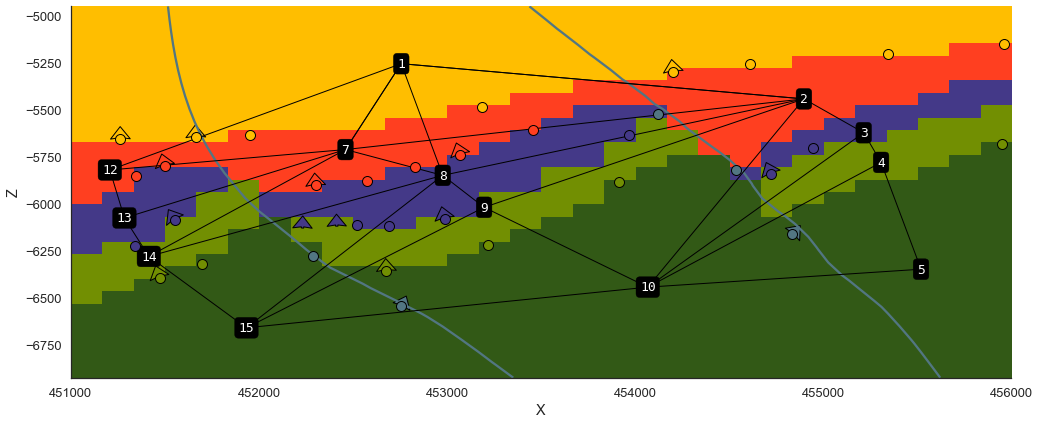

In [141]:
gp.plot.plot_section(geo_model, 24)
# gp.plot.plot_topology(geo_model, edges_init, centroids_init)
gp.plot.plot_topology(geo_model, edges[1], centroids[1], edge_kwargs=dict(color="black"))

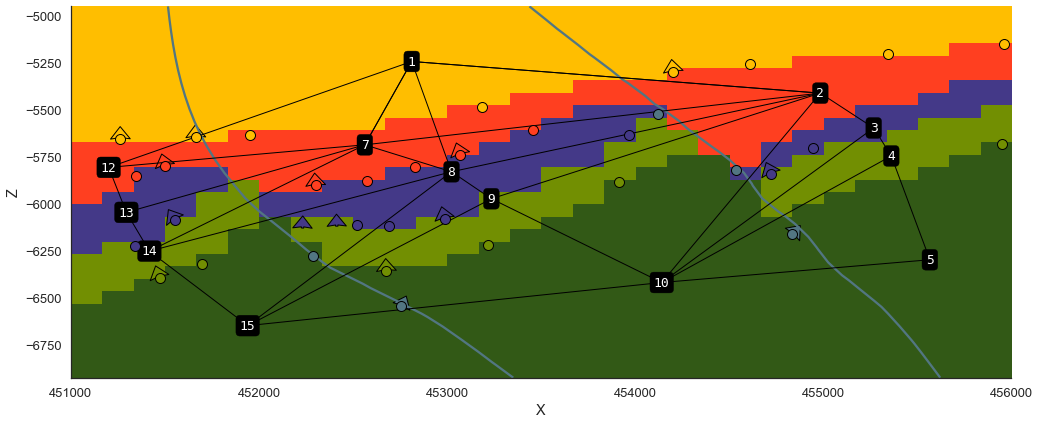

In [142]:
gp.plot.plot_section(geo_model, 24)
# gp.plot.plot_topology(geo_model, edges_init, centroids_init)
gp.plot.plot_topology(geo_model, edges[0], centroids[0], edge_kwargs=dict(color="black"))

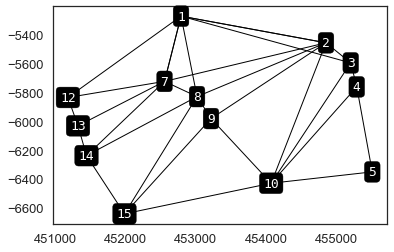

In [10]:
gp.plot.plot_topology(geo_model, edges[0], centroids[0])

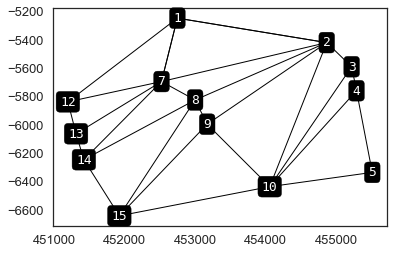

In [29]:
gp.plot.plot_topology(geo_model, edges[np.where(np.array(idx) == 1)[0][0]], centroids[np.where(np.array(idx) == 1)[0][0]])

In [30]:
tp.jaccard_index(edges_init, edges[np.where(np.array(idx) == 1)[0][0]])

0.9655172413793104

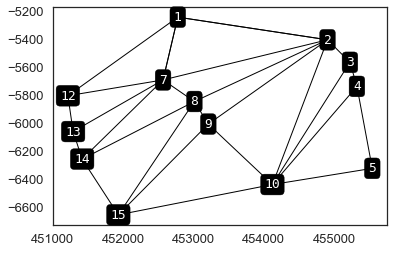

In [31]:
gp.plot.plot_topology(geo_model, edges[np.where(np.array(idx) == 2)[0][0]], centroids[np.where(np.array(idx) == 2)[0][0]])

In [32]:
tp.jaccard_index(edges_init, edges[np.where(np.array(idx) == 2)[0][0]])

0.9655172413793104

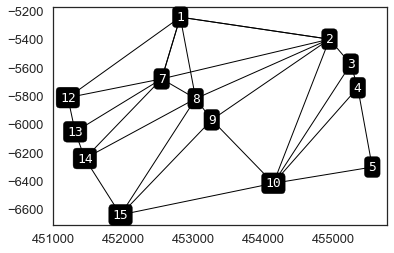

In [36]:
gp.plot.plot_topology(geo_model, edges[np.where(np.array(idx) == 5)[0][0]], centroids[np.where(np.array(idx) == 5)[0][0]])

In [37]:
tp.jaccard_index(edges_init, edges[np.where(np.array(idx) == 5)[0][0]])

1.0

In [20]:
M = tp.get_adjacency_matrix(geo_model, edges_init, centroids_init)

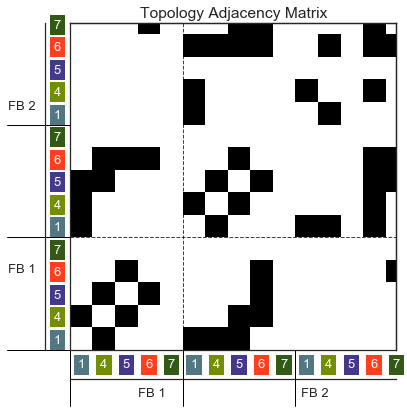

In [26]:
tp.plot_adjacency_matrix(geo_model, M)

In [23]:
from pathlib import Path

In [27]:
Path("./test/").

SyntaxError: invalid syntax (<ipython-input-27-f35150991b9a>, line 1)

In [12]:
thresholds = "0.5, 0.25"

In [16]:
list(map(float, thresholds.split(",")))

[0.5, 0.25]

NameError: name 'stochastic_model' is not defined

In [21]:
storage

{0.5: None, 0.25: None}